In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import scorecardpy as sc
from xverse.transformer import MonotonicBinning
from xverse.feature_subset import FeatureSubset
from xverse.feature_subset import SplitXY
from xverse.transformer import WOE
from xverse.graph import BarCharts
from xverse.ensemble import VotingSelector
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import scikitplot as skplt

In [2]:
df = pd.read_excel('German.xlsx')

In [3]:
df.head()

,Checking,Duration,History,Purpose,Amount,Savings,Emploed,Installp,marital,Coapp,...,Age,Other,housing,Existcr,Job,Depends,Telephone,Foreign,Bad,Good
0,1,6,4,3,1169,5,5,4,3,1,...,67,3,2,2,3,1,2,1,0,1
1,2,48,2,3,5951,1,3,2,2,1,...,22,3,2,1,3,1,1,1,1,0
2,4,12,4,6,2096,1,4,2,3,1,...,49,3,2,1,2,2,1,1,0,1
3,1,42,2,2,7882,1,4,2,3,3,...,45,3,3,1,3,2,1,1,0,1
4,1,24,3,0,4870,1,3,3,3,1,...,53,3,3,2,3,2,1,1,1,0


In [4]:
df.rename(columns = {'Good': "target"}, inplace = True)

In [5]:
df.drop('Bad', axis = 1, inplace = True)

In [6]:
df['Purpose'].replace('X', 10, inplace =True)

In [7]:
df['target'].sum()

700

### Before we doing next step to find which variables we want to using to predict and find a suit bins. We need redefined the varibale type

In [8]:
df = df.astype({"Checking":'category', "Duration":'int64', 'History': 'category', 'Purpose': 'category', 'Amount': 'int64',
               'Savings': 'category', 'Emploed': 'category', 'Installp': 'int64', 'marital': 'category', 'Coapp': 'category',
               'Resident': 'int64', 'Property': 'category', 'Age': 'int64', 'Other' : 'category', 'housing' :'category', 
               'Existcr': 'int64', 'Job': 'category', 'Depends': 'int64', 'Telephone': 'category', 'Foreign':'category'}) 

In [9]:
df_1 = df[df['Duration'] > 12]
df_2 = df[df['Duration'] <= 12]

In [10]:
X = df_1.iloc[:,0:20]
y = df_1['target']

In [11]:
selector = VotingSelector(selection_techniques = ['WOE', 'ETC','RF', 'CS'])
selector.fit(X, y)

VotingSelector(exclude_features=None, feature_names='all',
               handle_category='woe', minimum_votes=0, no_of_features=10,
               numerical_missing_values='median',
               selection_techniques=['WOE', 'ETC', 'RF', 'CS'])

In [12]:
selector.feature_importances_

,Variable_Name,Information_Value,Random_Forest,Extra_Trees,Chi_Square
0,Checking,0.694408,0.116614,0.127878,34.566215
1,Savings,0.298143,0.057858,0.061445,15.926807
2,Purpose,0.246365,0.078067,0.069480,8.460315
3,History,0.216088,0.050869,0.057869,2.973992
4,Emploed,0.106890,0.054892,0.058363,4.698081
5,housing,0.104989,0.027812,0.033148,3.350987
6,Duration,0.097313,0.091382,0.074789,2.812694
7,Amount,0.068950,0.128591,0.074250,1.290253
8,marital,0.053056,0.033584,0.037180,0.984834
9,Property,0.052375,0.041334,0.047933,1.421468


In [13]:
selector.feature_votes_

,Variable_Name,Information_Value,Random_Forest,Extra_Trees,Chi_Square,Votes
0,Checking,1,1,1,1,4
2,Purpose,1,1,1,1,4
3,History,1,1,1,1,4
4,Emploed,1,1,1,1,4
6,Duration,1,1,1,1,4
7,Amount,1,1,1,1,4
9,Property,1,1,1,1,4
1,Savings,1,1,1,1,4
5,housing,1,0,0,1,2
18,Installp,0,1,1,0,2


### Based on voted by information values, random_forest, Extra_tree and Chi_Square methods. We should decided using 'Checking', 'Amount', 'Saving', and 'purpose' as 4 predictors

## finding the right bins

In [14]:
numerical_features = list(df_1._get_numeric_data().columns)
categorical_features = list(df_1.columns.difference(numerical_features))
print(numerical_features)

clf = FeatureSubset(numerical_features) #select only numeric features
df_1_num = clf.fit_transform(df_1)

['Duration', 'Amount', 'Installp', 'Resident', 'Age', 'Existcr', 'Depends', 'target']


In [15]:
binnor = SplitXY(['target']) #Split the dataset into X and y
X, y = binnor.fit_transform(df_1_num) #returns features (X) dataset and target(Y) as a numpy array

In [16]:
binnor = MonotonicBinning()
binnor.fit(X, y)

MonotonicBinning(cardinality_cutoff=5, custom_binning=None, feature_names='all',
                 force_bins=4, max_bins=20, prefix=None)

In [17]:
binnor.bins
output_bins = binnor.bins

In [18]:
out_X = binnor.transform(X)

In [19]:
df_pre_1 = df_1[['Checking', 'Savings', 'Purpose', 'target']]
df_pre_1['Amount'] = out_X['Amount']

In [20]:
df_pre_1['Purpose'] = pd.qcut(df_pre_1['Purpose'], 3, labels=["Purpose_1", "Purpose_2", "Purpose_3"])

In [21]:
df_pre_1= pd.get_dummies(df_pre_1, prefix=['Checking', 'Savings', 'Purpose', 'Amount'])

In [22]:
df_pre_1

,target,Checking_1,Checking_2,Checking_3,Checking_4,Savings_1,Savings_2,Savings_3,Savings_4,Savings_5,Purpose_Purpose_1,Purpose_Purpose_2,Purpose_Purpose_3,"Amount_(391.999, 2323.667]","Amount_(2323.667, 4246.333]","Amount_(4246.333, 18424.0]"
1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1
3,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1
4,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1
5,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1
6,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,1,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0
993,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0
996,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0
998,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0


In [23]:
X = df_pre_1.iloc[:,1::]
y = df_pre_1['target']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = 0)

In [25]:
clf = LinearDiscriminantAnalysis(solver = 'eigen', shrinkage = 'auto').fit(X_train, y_train)
y_Pred = clf.predict(X_test)
y_score = clf.predict_proba(X_test)

In [26]:
df_ks = pd.DataFrame({'y': y_Pred, 'p': y_score[:,1]})

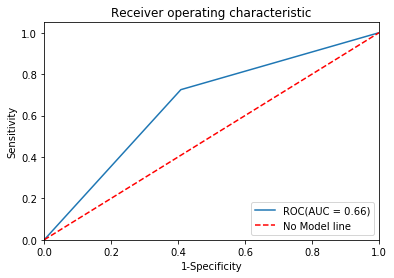

In [27]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_Pred)
    roc_auc[i] = auc(fpr[i], tpr[i])

a = roc_auc_score(y_test, y_Pred)
plt.figure()
plt.plot(fpr[1], tpr[1], label='ROC(AUC = %0.2f)' % (a))
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label = 'No Model line')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.title('Receiver operating characteristic')
plt.legend(loc = 'lower right')
plt.show()

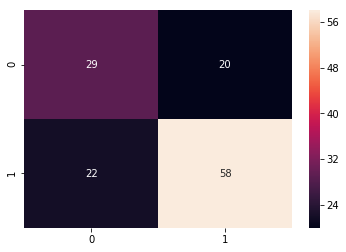

In [28]:
sns.heatmap(confusion_matrix(y_test, y_Pred), annot=True)

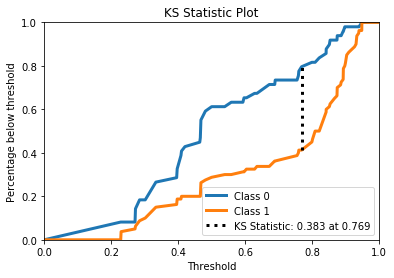

In [29]:
skplt.metrics.plot_ks_statistic(y_test, y_score)

In [30]:
print(classification_report(y_test, y_Pred))

              precision    recall  f1-score   support

           0       0.57      0.59      0.58        49
           1       0.74      0.72      0.73        80

    accuracy                           0.67       129
   macro avg       0.66      0.66      0.66       129
weighted avg       0.68      0.67      0.68       129



In [31]:
print('Gini:', 2*roc_auc_score(y_test, y_Pred)-1)

Gini: 0.31683673469387763


In [32]:
results = pd.DataFrame({'Variables' :X.columns, 'Coefficients': clf.coef_.flatten()})
a_row = pd.Series({'Variables': 'intercept', 'Coefficients':np.float(clf.intercept_),})
row_df = pd.DataFrame([a_row])
results = pd.concat([row_df, results])

In [33]:
results

,Variables,Coefficients
0,intercept,0.743944
0,Checking_1,-1.076279
1,Checking_2,-0.229916
2,Checking_3,0.817087
3,Checking_4,1.289059
4,Savings_1,-0.442916
5,Savings_2,-0.072035
6,Savings_3,0.077081
7,Savings_4,0.711489
8,Savings_5,0.529599


In [34]:
clf = LogisticRegression(random_state = 0).fit(X_train, y_train)
y_Pred = clf.predict(X_test)
y_score = clf.predict_proba(X_test)

In [35]:
results = pd.DataFrame({'Variables' :X.columns, 'Coefficients': clf.coef_.flatten()})
a_row = pd.Series({'Variables': 'intercept', 'Coefficients':np.float(clf.intercept_),})
row_df = pd.DataFrame([a_row])
results = pd.concat([row_df, results])

In [36]:
results

,Variables,Coefficients
0,intercept,1.045643
0,Checking_1,-1.023778
1,Checking_2,-0.416837
2,Checking_3,0.402004
3,Checking_4,1.038384
4,Savings_1,-0.548258
5,Savings_2,-0.272207
6,Savings_3,-0.085241
7,Savings_4,0.548193
8,Savings_5,0.357287


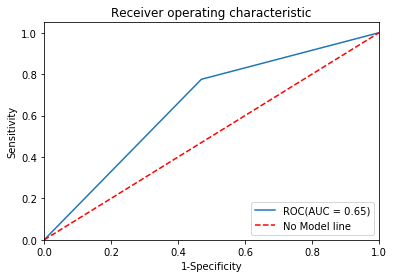

In [37]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_Pred)
    roc_auc[i] = auc(fpr[i], tpr[i])

a = roc_auc_score(y_test, y_Pred)
plt.figure()
plt.plot(fpr[1], tpr[1], label='ROC(AUC = %0.2f)' % (a))
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label = 'No Model line')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

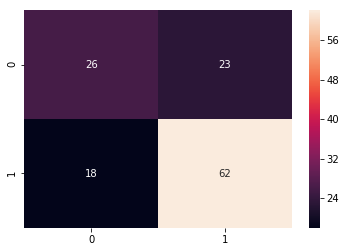

In [38]:
sns.heatmap(confusion_matrix(y_test, y_Pred), annot=True)

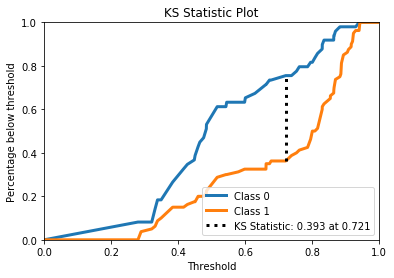

In [39]:
skplt.metrics.plot_ks_statistic(y_test, y_score)

In [40]:
print(classification_report(y_test, y_Pred))

              precision    recall  f1-score   support

           0       0.59      0.53      0.56        49
           1       0.73      0.78      0.75        80

    accuracy                           0.68       129
   macro avg       0.66      0.65      0.66       129
weighted avg       0.68      0.68      0.68       129



In [41]:
print('Gini:', 2*roc_auc_score(y_test, y_Pred)-1)

Gini: 0.305612244897959


# =================

In [42]:
X = df_2.iloc[:,0:20]
y = df_2['target']

In [43]:
selector = VotingSelector(selection_techniques = ['WOE', 'ETC','RF', 'CS'])
selector.fit(X, y)

VotingSelector(exclude_features=None, feature_names='all',
               handle_category='woe', minimum_votes=0, no_of_features=10,
               numerical_missing_values='median',
               selection_techniques=['WOE', 'ETC', 'RF', 'CS'])

In [44]:
selector.feature_importances_

,Variable_Name,Information_Value,Random_Forest,Extra_Trees,Chi_Square
0,Checking,0.626894,0.096729,0.104323,12.990970
1,History,0.517376,0.063189,0.075271,3.131430
2,Property,0.288624,0.065543,0.068537,4.457752
3,Age,0.182984,0.119580,0.066328,0.925710
4,Foreign,0.170102,0.006000,0.010574,5.196341
5,Purpose,0.162433,0.075478,0.066567,0.892303
6,Installp,0.150899,0.042158,0.048006,1.887022
7,Other,0.129323,0.034695,0.036261,0.714888
8,Emploed,0.126376,0.050831,0.057263,1.403381
9,Existcr,0.100822,0.023947,0.029762,1.020269


In [45]:
selector.feature_votes_

,Variable_Name,Information_Value,Random_Forest,Extra_Trees,Chi_Square,Votes
0,Checking,1,1,1,1,4
2,Property,1,1,1,1,4
8,Emploed,1,1,1,1,4
1,History,1,1,1,1,4
3,Age,1,1,1,0,3
5,Purpose,1,1,1,0,3
6,Installp,1,1,0,1,3
15,Duration,0,1,1,1,3
4,Foreign,1,0,0,1,2
18,Resident,0,1,1,0,2


In [46]:
numerical_features = list(df_2._get_numeric_data().columns)
categorical_features = list(df_2.columns.difference(numerical_features))
print(numerical_features)

clf = FeatureSubset(numerical_features) #select only numeric features
df_2_num = clf.fit_transform(df_2)

['Duration', 'Amount', 'Installp', 'Resident', 'Age', 'Existcr', 'Depends', 'target']


In [47]:
binnor = SplitXY(['target']) #Split the dataset into X and y
X, y = binnor.fit_transform(df_2_num) #returns features (X) dataset and target(Y) as a numpy array

In [48]:
binnor = MonotonicBinning()
binnor.fit(X, y)

MonotonicBinning(cardinality_cutoff=5, custom_binning=None, feature_names='all',
                 force_bins=4, max_bins=20, prefix=None)

In [49]:
binnor.bins
output_bins = binnor.bins

In [50]:
out_X = binnor.transform(X)

In [51]:
df_pre_2 = df_2[['Checking', 'History', 'Property', 'target']]
df_pre_2['Age'] = out_X['Age']

In [52]:
df_pre_2= pd.get_dummies(df_pre_2, prefix=['Checking', 'History', 'Property', 'Age'])

In [53]:
df_pre_2

,target,Checking_1,Checking_2,Checking_3,Checking_4,History_0,History_1,History_2,History_3,History_4,Property_1,Property_2,Property_3,Property_4,"Age_(18.999, 29.0]","Age_(29.0, 40.0]","Age_(40.0, 75.0]"
0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1
2,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1
8,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
10,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0
12,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1
990,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0
994,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1
995,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0


In [54]:
X = df_pre_2.iloc[:,1::]
y = df_pre_2['target']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = 0)

In [56]:
clf = LinearDiscriminantAnalysis(solver = 'eigen', shrinkage = 'auto').fit(X_train, y_train)
y_Pred = clf.predict(X_test)
y_score = clf.predict_proba(X_test)

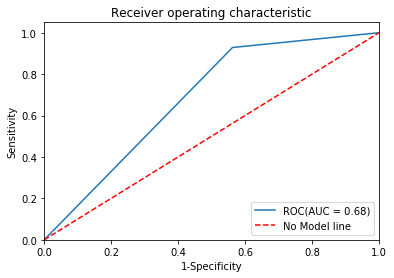

In [57]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_Pred)
    roc_auc[i] = auc(fpr[i], tpr[i])

a = roc_auc_score(y_test, y_Pred)
plt.figure()
plt.plot(fpr[1], tpr[1], label='ROC(AUC = %0.2f)' % (a))
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label = 'No Model line')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

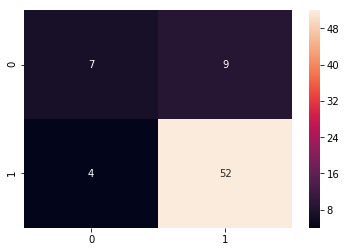

In [58]:
sns.heatmap(confusion_matrix(y_test, y_Pred), annot=True)

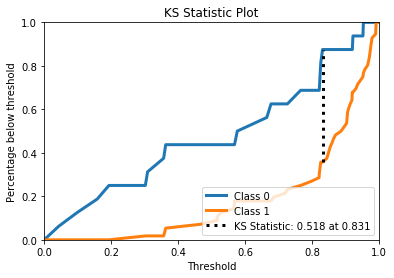

In [59]:
skplt.metrics.plot_ks_statistic(y_test, y_score)

In [60]:
print(classification_report(y_test, y_Pred))

              precision    recall  f1-score   support

           0       0.64      0.44      0.52        16
           1       0.85      0.93      0.89        56

    accuracy                           0.82        72
   macro avg       0.74      0.68      0.70        72
weighted avg       0.80      0.82      0.81        72



In [61]:
print('Gini:', 2*roc_auc_score(y_test, y_Pred)-1)

Gini: 0.3660714285714286


In [62]:
results = pd.DataFrame({'Variables' :X.columns, 'Coefficients': clf.coef_.flatten()})
a_row = pd.Series({'Variables': 'intercept', 'Coefficients':np.float(clf.intercept_),})
row_df = pd.DataFrame([a_row])
results = pd.concat([row_df, results])

In [63]:
results

,Variables,Coefficients
0,intercept,1.324546
0,Checking_1,-1.145839
1,Checking_2,-0.273522
2,Checking_3,0.481302
3,Checking_4,1.187367
4,History_0,-2.606842
5,History_1,-1.816565
6,History_2,-0.079302
7,History_3,0.865412
8,History_4,0.830624


In [64]:
clf = LogisticRegression(random_state = 0).fit(X_train, y_train)
y_Pred = clf.predict(X_test)
y_score = clf.predict_proba(X_test)

In [65]:
results = pd.DataFrame({'Variables' :X.columns, 'Coefficients': clf.coef_.flatten()})
a_row = pd.Series({'Variables': 'intercept', 'Coefficients':np.float(clf.intercept_),})
row_df = pd.DataFrame([a_row])
results = pd.concat([row_df, results])

In [66]:
results

,Variables,Coefficients
0,intercept,0.955954
0,Checking_1,-0.817976
1,Checking_2,-0.351220
2,Checking_3,0.144039
3,Checking_4,1.024912
4,History_0,-0.860238
5,History_1,-0.693434
6,History_2,0.086326
7,History_3,0.538814
8,History_4,0.928288


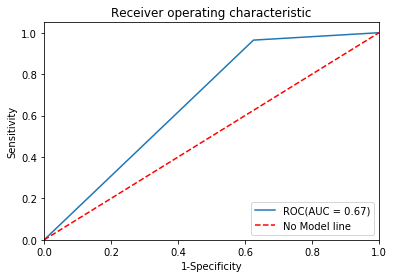

In [67]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_Pred)
    roc_auc[i] = auc(fpr[i], tpr[i])

a = roc_auc_score(y_test, y_Pred)
plt.figure()
plt.plot(fpr[1], tpr[1], label='ROC(AUC = %0.2f)' % (a))
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label = 'No Model line')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

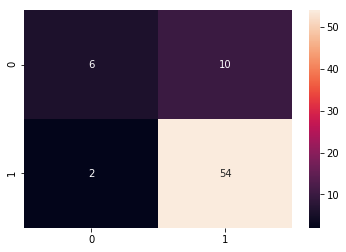

In [68]:
sns.heatmap(confusion_matrix(y_test, y_Pred), annot=True)

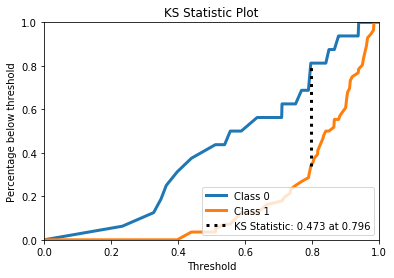

In [69]:
skplt.metrics.plot_ks_statistic(y_test, y_score)

In [70]:
print(classification_report(y_test, y_Pred))

              precision    recall  f1-score   support

           0       0.75      0.38      0.50        16
           1       0.84      0.96      0.90        56

    accuracy                           0.83        72
   macro avg       0.80      0.67      0.70        72
weighted avg       0.82      0.83      0.81        72



In [71]:
print('Gini:', 2*roc_auc_score(y_test, y_Pred)-1)

Gini: 0.3392857142857144
